In [9]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [10]:
from dqn import DQN, DQNAgent
from replay_buffer import ReplayBuffer
from her import HindsightExperienceReplay
from her2 import Player
from bit_flip_env import BitFlipEnv

In [17]:
n_bits = 50
env = BitFlipEnv(num_bits=n_bits)
state_dim = env.state_dim
n_actions = env.n_actions
state_dim, n_actions

(50, 50)

In [18]:
agent = DQN(state_dim * 2, n_actions, hidden_size=256)
buffer = ReplayBuffer(size=1_000_000)
player = Player(env, agent, buffer)

In [21]:
epochs = 40
epoch_iters = 50
success_history = []
success_history2 = []

Epoch 30 epsilon = 0.20 success rate = 0.955


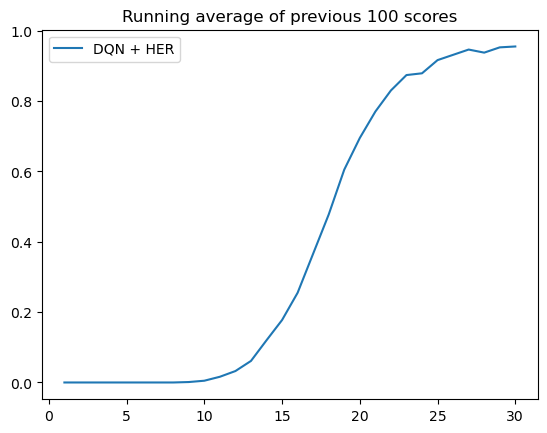

 80%|████████  | 40/50 [00:16<00:04,  2.37it/s]


KeyboardInterrupt: 

In [22]:
from tqdm import tqdm
import numpy as np
from utils import plot_learning_curve
import matplotlib.pyplot as plt

epsilon = 0.2
for epoch in range(epochs):
    score_history = []
    score_history2 = []
    for iter in tqdm(range(epoch_iters)):
        score, success = player.play_and_record(num_episodes=16, epsilon=epsilon)
        player.update_agent()
        score_history.append(float(success))



    if epsilon > 0:
        epsilon -= 0.01

    success_rate = np.mean(score_history)
    success_history.append(success_rate)
    plot_learning_curve(success_history, name="DQN + HER") 


    print(f"Epoch {epoch + 1} epsilon = {agent.epsilon:.2f} success rate = {success_rate}")
    plt.show()